In [1]:
print(21*6+2)

128


In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("data/label_3_test4_output.csv")
len(data)
# print(data)

data_list = data.values.tolist()

# 결과 출력
print(len(data_list))

11


In [4]:
label_0 = pd.read_csv("data/label_0_full.csv")
label_1 = pd.read_csv("data/label_1_full.csv")
label_2 = pd.read_csv("data/label_2_full.csv")
label_3 = pd.read_csv("data/label_3_full.csv")

len_0 = len(label_0)
len_1 = len(label_1)
len_2 = len(label_2)
len_3 = len(label_3)

label_X = [label_0, label_1, label_2, label_3]
rem = [len_0, len_1, len_2, len_3]

for i in range(4):
    r = rem[i] % 100
    label_X[i] = label_X[i].iloc[:rem[i] - r]

    print(len(label_X[i]))

data_split_0 = np.array_split(label_X[0], len(label_X[0]) // 100)
data_split_1 = np.array_split(label_X[1], len(label_X[1]) // 100)
data_split_2 = np.array_split(label_X[2], len(label_X[2]) // 100)
data_split_3 = np.array_split(label_X[3], len(label_X[3]) // 100)


y_label_0 = np.zeros(len(data_split_0))
y_label_1 = np.ones(len(data_split_1))
y_label_2 = np.full(len(data_split_2), 2)
y_label_3 = np.full(len(data_split_3), 3)

print(len(data_split_1), len(data_split_1[0]))

train_ratio = 0.7
temp_ratio = 0.3  # for both val and test combined
val_ratio = 0.5  # 50% of temp_ratio for validation
test_ratio = temp_ratio / 2  # same as val_ratio

data_splits = [data_split_0, data_split_1, data_split_2, data_split_3]
y_data_splits = [y_label_0, y_label_1, y_label_2, y_label_3]

train_sizes = []
train_data = []
val_data = []
test_data = []

y_train_data = []
y_val_data = []
y_test_data = []

for i in range(4):
    data_len = len(data_splits[i])
    train_size = int(data_len * train_ratio)
    temp_size = data_len - train_size 
    val_size = int(temp_size * val_ratio)
    
    # Split the data
    train_sizes.append(train_size)
    train_data.append(data_splits[i][:train_size])
    val_data.append(data_splits[i][train_size:train_size + val_size])
    test_data.append(data_splits[i][train_size + val_size:])

    # Split the labels
    y_train_data.append(y_data_splits[i][:train_size])
    y_val_data.append(y_data_splits[i][train_size:train_size + val_size])
    y_test_data.append(y_data_splits[i][train_size + val_size:])

# check the lengths of each split
for i in range(4):
    print(f"Data split {i}: train + val + test =", len(train_data[i]), "+", len(val_data[i]), "+", len(test_data[i]))

# Concatenate all splits across the 4 data parts
x_train_concat = np.concatenate(train_data, axis=0)
x_val_concat = np.concatenate(val_data, axis=0)
x_test_concat = np.concatenate(test_data, axis=0)

y_train_concat = np.concatenate(y_train_data, axis=0)
y_val_concat = np.concatenate(y_val_data, axis=0)
y_test_concat = np.concatenate(y_test_data, axis=0)

# Output final shapes to confirm correct splitting
print("Train data shape:", x_train_concat.shape)
print("Validation data shape:", x_val_concat.shape)
print("Test data shape:", x_test_concat.shape)


from keras.utils import to_categorical

# Convert y_train and y_valid to one-hot encoding
y_train_one_hot = to_categorical(y_train_concat, num_classes=4)  # Assuming classes are 0, 1, 2, 3
y_valid_one_hot = to_categorical(y_val_concat, num_classes=4)  # Assuming you have a similar y_valid
y_test_one_hot = to_categorical(y_test_concat, num_classes=4)  # Assuming you have a similar y_test

# Check the shape
print(y_train_one_hot.shape)  # Should be (10070, 4)
print(y_valid_one_hot.shape) 
print(y_test_one_hot.shape) 

1445800
1440100
1414800
1439900


/Users/seyeong/anaconda3/envs/anomaly_detection/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


14401 100
Data split 0: train + val + test = 10120 + 2169 + 2169
Data split 1: train + val + test = 10080 + 2160 + 2161
Data split 2: train + val + test = 9903 + 2122 + 2123
Data split 3: train + val + test = 10079 + 2160 + 2160
Train data shape: (40182, 100, 3)
Validation data shape: (8611, 100, 3)
Test data shape: (8613, 100, 3)
(40182, 4)
(8611, 4)
(8613, 4)


In [5]:
from tensorflow.keras.models import load_model
from tensorflow import keras

# 기존 모델 로드
model = keras.models.load_model("conv_net_v1.h5")
model.summary()

# 모델 호출로 입력을 정의합니다.
example_input = np.random.rand(1, 100, 3)  # 예제 입력 정의
_ = model(example_input)  # 모델 호출하여 입력을 정의합니다.

# 소프트맥스 레이어 제외한 모델 생성
model_without_softmax = keras.models.Model(inputs=model.inputs, outputs=model.layers[-2].output)

# 확인
model_without_softmax.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 100, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 100, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 50, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 50, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,998 (441.40 KB)

 Trainable params: 112,996 (441.39 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 100, 3)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 100, 32)        │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 100, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 50, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ (None, 50, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 50, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 25, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 25, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_12 (Conv1D)              │ (None, 25, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 112,480 (439.38 KB)

 Trainable params: 112,480 (439.38 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
ans = model_without_softmax.predict(x_test_concat, verbose=1)


270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [7]:
print(len(ans))

8613


In [8]:
import numpy as np
from collections import Counter

def softmax(input_array):
    # 최대값을 빼서 overflow 방지
    max_val = np.max(input_array)
    exp_array = np.exp(input_array - max_val)
    sum_exp = np.sum(exp_array)
    return exp_array / sum_exp

def reduce_output(softmax_output, num_classes):
    # 각 클래스에 대한 출력을 수집
    class_size = len(softmax_output) // num_classes  # 각 클래스에 해당하는 출력 개수
    final_output = np.zeros(num_classes)

    for i in range(num_classes):
        # 각 클래스에 해당하는 softmax_output의 합을 계산
        final_output[i] = np.sum(softmax_output[i * class_size:(i + 1) * class_size])

    # 총합으로 정규화
    final_output /= np.sum(final_output)
    return final_output

# 128개의 랜덤 입력값 생성 (예시)
# input_array = np.random.rand(128)
input_array = np.array([0., 0., 0., 3.736754, 0., 0.,
                  4.580537, 0., 0., 4.652861, 0., 0.4098375,
                  0., 0., 0.57859415, 0., 2.7483222, 0.,
                  0.12054045, 0., 0., 0., 0., 0., 3.3992407,
                  0., 1.8081067, 0., 2.3384848, 0., 0.,
                  0., 0., 0., 0., 0., 0., 0., 0.,
                  0., 0., 0., 0., 0., 0., 0., 0.,
                  2.8206465, 0., 0., 0., 0., 1.4705935,
                  0., 0., 0., 0., 0., 0., 0., 0.,
                  0., 0., 2.3867009, 0., 0., 3.3751326,
                  3.6644297, 0., 0., 0., 0., 0.,
                  0.4339456, 0., 0., 0., 0., 0.,
                  0., 0., 0., 1.8804309, 0., 0.,
                  2.0974038, 2.965295, 0., 0.795567, 0.,
                  0., 0., 0., 0., 0., 0., 0., 0.,
                  0., 0., 0., 0., 0., 0., 2.6277819,
                  0., 0., 3.0858355, 0., 0., 0.,
                  0., 0., 0., 0.530378, 0., 0.,
                  0., 2.7001061, 0., 0., 0., 0.,
                  0., 0.8919993, 0., 0., 2.0250795, 3.0135112,
                  0., 0.])

# 소프트맥스 계산

output = []
for i in range(len(ans)):
    softmax_output = softmax(ans[i])

    # 4개의 출력으로 변환
    final_output = reduce_output(softmax_output, num_classes=4)

    # print(final_output)
    max_index = np.argmax(final_output)
    max_value = final_output[max_index]
    # print(f"{max_index}, {final_output[max_index]:.4f}")
    output.append(max_index)


    # # 결과 출력
    # for i in range(4):
    #     print(f"Class {i} Probability: {final_output[i]:.4f}")


# 총합이 1인지 확인
# print(f"Total Probability Sum: {np.sum(final_output):.4f}")


label_counts = Counter(output)

# 전체 레이블의 수
total_labels = len(output)

# 각 레이블의 비율 계산
label_ratios = {label: count / total_labels for label, count in label_counts.items()}

# 결과 출력
print("Label Counts:", label_counts)
print("Label Ratios:", label_ratios)

Label Counts: Counter({0: 3491, 3: 2831, 1: 2287, 2: 4})
Label Ratios: {1: 0.2655288517357483, 0: 0.4053175432485777, 3: 0.3286891907581563, 2: 0.0004644142575177058}


In [9]:
ans_with_softmax = model.predict(x_test_concat, verbose=1)

270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
y_pred_argmax = np.argmax(ans_with_softmax, axis=1)



In [11]:


label_counts = Counter(y_pred_argmax)

# 전체 레이블의 수
total_labels = len(y_pred_argmax)

# 각 레이블의 비율 계산
label_ratios = {label: count / total_labels for label, count in label_counts.items()}

# 결과 출력
print("Label Counts:", label_counts)
print("Label Ratios:", label_ratios)

Label Counts: Counter({2: 2277, 3: 2265, 1: 2161, 0: 1910})
Label Ratios: {0: 0.2217578079647045, 3: 0.2629745733194009, 2: 0.26436781609195403, 1: 0.25089980262394057}


In [12]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test_concat, y_pred_argmax))

# 혼동 행렬 계산
cm = confusion_matrix(y_test_concat, y_pred_argmax)

# 혼동 행렬 출력
print("혼동 행렬:")
print(cm)

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      2169
         1.0       1.00      1.00      1.00      2161
         2.0       0.93      1.00      0.96      2123
         3.0       0.95      0.99      0.97      2160

    accuracy                           0.97      8613
   macro avg       0.97      0.97      0.97      8613
weighted avg       0.97      0.97      0.97      8613

혼동 행렬:
[[1894    0  154  121]
 [   0 2161    0    0]
 [   0    0 2123    0]
 [  16    0    0 2144]]


8613
0.50015414
Range 0.5 - 0.6: 119
Range 0.6 - 0.7: 132
Range 0.7 - 0.8: 158
Range 0.8 - 0.9: 248
Range 0.9 - 1.0: 5791
Range 1.0 - 1.1: 2165
[119, 132, 158, 248, 7956, 2165]


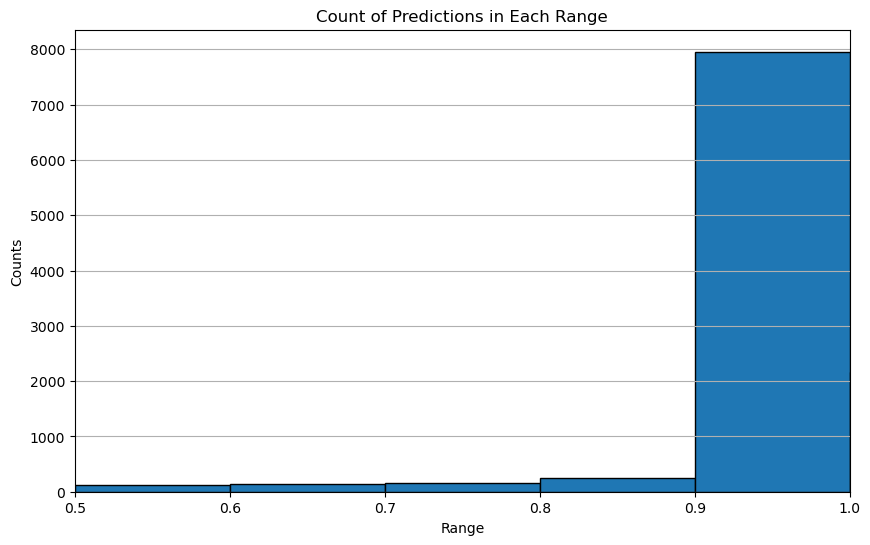

0.9237199582027168


In [56]:
import matplotlib.pyplot as plt
ans_with_softmax.shape

y_pred_value = []
for val in ans_with_softmax:
    y_pred_value.append(max(val))
    

y_pred_value.sort()
print(len(y_pred_value))
print(y_pred_value[0])
# 0.5부터 0.1 단위로 개수 세기
bins = np.arange(0.5, 1.1, 0.1)  # 0.5 ~ 1.0 구간
counts, _ = np.histogram(y_pred_value, bins=bins)
bar = []
# 출력
for i in range(len(bins) - 1):
    print(f"Range {bins[i]:.1f} - {bins[i+1]:.1f}: {counts[i]}")
    bar.append(counts[i])


bar[-2] += bar[-1]
print(bar)
plt.figure(figsize=(10, 6))

plt.bar(bins[:-1], bar, width=0.1, edgecolor='black', align='edge')  # 막대그래프

plt.xlabel('Range')
plt.ylabel('Counts')
plt.title('Count of Predictions in Each Range')
plt.xticks(bins)  # x축 눈금 설정
plt.xlim(0.5, 1.0)  # x축 범위 설정
plt.grid(axis='y')  # y축에 그리드 추가
plt.show()

print(bar[-2]/sum(bar[:-1]))

In [57]:
bar = bar[:-1]

[0.09901213069923785, 0.10969972452431014, 0.13134256514567363, 0.20692451057895536, 0.9473357864956631]
Range 0.5 - 0.6: 119
Range 0.6 - 0.7: 132
Range 0.7 - 0.8: 158
Range 0.8 - 0.9: 248
Range 0.9 - 1.0: 5791
Range 1.0 - 1.1: 2165
8613
8613


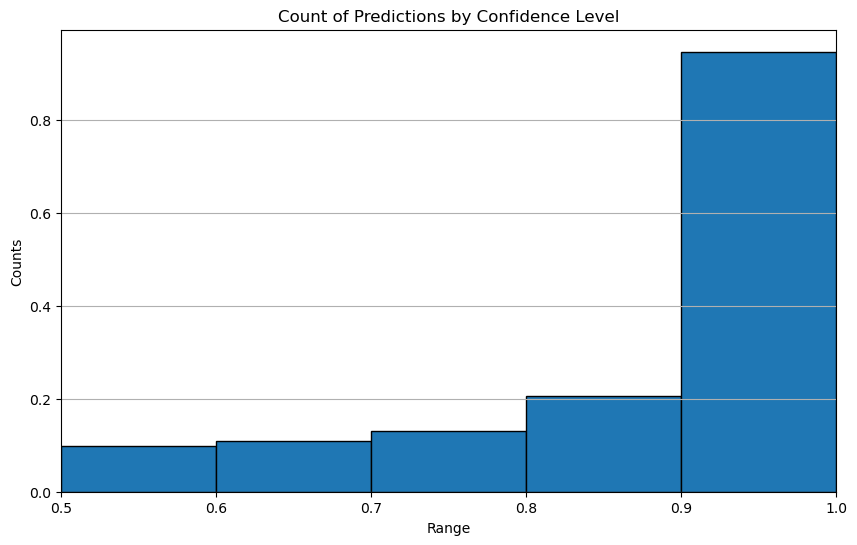

0.3774733637747336


In [58]:
ans_with_softmax.shape

y_pred_value = []
for val in ans_with_softmax:
    # y_pred_value.append(max(val))
    max_value = np.max(val)
    max_index = np.argmax(val)
    
    # 두 번째로 큰 값과 그 인덱스 찾기
    second_max_value = np.partition(val, -2)[-2]  # 두 번째로 큰 값
    second_max_index = np.where(val == second_max_value)[0][0] 

    y_pred_value.append([max_value, second_max_value, max_index, second_max_index])

y_pred_value.sort()



diff_bar = []
for i in range(len(bar)):
    diff = []
    for j in range(bar[i]):
        diff.append(abs(y_pred_value[j][0] - y_pred_value[j][1]))
    diff_bar.append(sum(diff)/bar[i])
print(diff_bar)
# 출력
for i in range(len(bins) - 1):
    print(f"Range {bins[i]:.1f} - {bins[i+1]:.1f}: {counts[i]}")

print(len(y_pred_value))
print(sum(counts))
# 코드 수정 할 것. 
# 또한 첫 번째 값과 두 번째 max 값을 빼서(절댓값) 얼마나 모델이 잘 구분하는지 파악
# range 별로 점검하기

plt.figure(figsize=(10, 6))

plt.bar(bins[:-2], diff_bar, width=0.1, edgecolor='black', align='edge')  # 막대그래프

plt.xlabel('Range')
plt.ylabel('Counts')
plt.title('Count of Predictions by Confidence Level')


# 레전드 추가
# plt.legend(['Counts of Predictions (Confidence)'], loc='upper right')  # 확신성을 포함한 레전드 추가

plt.xticks(bins)  # x축 눈금 설정
plt.xlim(0.5, 1.0)  # x축 범위 설정
plt.grid(axis='y')  # y축에 그리드 추가
plt.show()

print(bar[-2]/sum(bar[:-1]))


In [61]:
import tensorflow as tf
print(tf.__version__)

2.17.0
